## **How to increase Cross-Selling of Banking Products**




**Name**: Cross selling Exploratory Data Analysis and Recommendation

**Report date**: August 1, 2021
 
**Email**: peterkin_nicolette@yahoo.com 

**Country**: Jamaica 

**Specialization**: Data Analyst 

**Group Name**: Dynasty 


**Problem description**: 

Changing to a new selling technique requires a lot of research and data analyzing to ensure that the right cross selling strategy is used to re-enter the market. The issue XYZ credit union is having currently is that they do not know what actions to take in order to increase cross selling in the credit union. 


**Business Understanding**:

Our goal is to create an exploratory data analysis for XYZ credit unions’ dataset and create a cross-selling plan solution. The EDA report will be specific and meaningful so there is no room for assumptions. As the data analyst assigned to this project my job is to analyze the given data with much scrutiny in order to provide XYZ credit union with vital insights on cross
selling. Once the exploratory data analyze report is completed XYZ credit union will have actionable insights which can then be used to inform their cross-selling campaigns.


*Loading the nesscessary libaries.*

In [ ]:
import zipfile
with zipfile.ZipFile('./cross_selling.zip', 'r') as zip_ref:
    zip_ref.extractall('./')

In [1]:
# import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

*Here we are setting up the configuration and utility files.*

In [2]:
%%writefile configuration.yaml
file_type: csv
dataset_name: train
file_name: Train
table_name: train_data
inbound_delimiter: ","
outbound_delimiter: "|"
skip_leading_rows: 1
columns:

Overwriting configuration.yaml


In [3]:
%%writefile utility.py
import math
import logging
import os
import subprocess
import yaml
import pandas as pd
import datetime 
import gc
import re
import gzip
import shutil
import numpy as np
import seaborn as sns

################
# File Reading #
################

def read_config_file(filepath):
    with open(filepath, 'r') as stream:
        try:
            return yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            logging.error(exc)


Overwriting utility.py


*Here we are loading the Train Dataset.*

In [4]:
import pandas as pd
import utility as util

# Read config file
config_data = util.read_config_file("configuration.yaml")

# read the file using config file
file_type = config_data['file_type']
source_file = "./" + config_data['file_name'] + f'.{file_type}'

#print("",source_file)
df = pd.read_csv(source_file,config_data['inbound_delimiter'])

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Data Understanding**

In [ ]:
# Total missing values for each feature
print(df.isnull().sum())

fecha_dato                      0
ncodpers                        0
ind_empleado                27734
pais_residencia             27734
sexo                        27804
age                             0
fecha_alta                  27734
ind_nuevo                   27734
antiguedad                      0
indrel                      27734
ult_fec_cli_1t           13622516
indrel_1mes                149781
tiprel_1mes                149781
indresi                     27734
indext                      27734
conyuemp                 13645501
canal_entrada              186126
indfall                     27734
tipodom                     27735
cod_prov                    93591
nomprov                     93591
ind_actividad_cliente       27734
renta                     2794375
segmento                   189368
ind_ahor_fin_ult1               0
ind_aval_fin_ult1               0
ind_cco_fin_ult1                0
ind_cder_fin_ult1               0
ind_cno_fin_ult1                0
ind_ctju_fin_u

##### The code ran above is to find out what are the missing values in the dataset.

In [ ]:
# Data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

##### The dataframe consist of eight(8) floats64, twenty-three(23) int64 and seventeen(17) object.
                              


In [ ]:
# show rows with missing value for ind_empleado
df[df['ind_empleado'].isnull()]

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
261,2015-01-28,1050741,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1029,2015-01-28,1051017,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1063,2015-01-28,1051064,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1154,2015-01-28,1051387,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
1779,2015-01-28,1048660,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3775976,2015-06-28,550081,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
3776175,2015-06-28,550693,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
3776230,2015-06-28,549518,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0
3776279,2015-06-28,549207,NaN,NaN,NaN,NA,NaN,NaN,NA,NaN,...,0,0,0,1,0,0,0,NaN,NaN,0


*The table above shows that there are NA and NAN values that we will need to clean later in our EDA.*

In [ ]:
df1 = df[df.isna().any(axis=1)]
print(df1);

          fecha_dato  ncodpers ind_empleado pais_residencia sexo  age  \
0         2015-01-28   1375586            N              ES    H   35   
1         2015-01-28   1050611            N              ES    V   23   
2         2015-01-28   1050612            N              ES    V   23   
3         2015-01-28   1050613            N              ES    H   22   
4         2015-01-28   1050614            N              ES    V   23   
...              ...       ...          ...             ...  ...  ...   
13647304  2016-05-28   1166765            N              ES    V   22   
13647305  2016-05-28   1166764            N              ES    V   23   
13647306  2016-05-28   1166763            N              ES    H   47   
13647307  2016-05-28   1166789            N              ES    H   22   
13647308  2016-05-28   1550586            N              ES    H   37   

          fecha_alta  ind_nuevo antiguedad  indrel  ... ind_hip_fin_ult1  \
0         2015-01-12        0.0          6     

In [ ]:
# Unique customer code - skew
print(df.ncodpers.nunique())

956645


*The code shows that there are alot of duplicates in the dataset.*

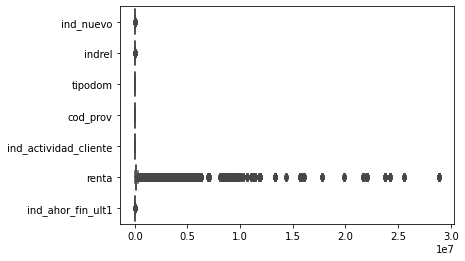

In [ ]:

# Outliner
sns.boxplot(data = df[['ind_nuevo', 'indrel', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta', 'ind_ahor_fin_ult1']], palette= "rainbow", orient= 'h');

##### From the above graph it is evident that the dataset has outliers.

### In order to overcome some of the NA values we will use the mean value to fill in the missing information and for the ones thats we are unable to fill we will remove them. 
### For duplicate values we will remove them as they are not needed in the dataset.
###Also we intend on removing the outliers in the dataset as they will not change the actionable insights gained from the dataset. 

### **Data Cleaning and Transformation**

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.describe(include = 'all')

,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07,1.364731e+07,1.364731e+07,1.364731e+07,...,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.363125e+07,1.363125e+07,1.364731e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05,1.022912e-04,2.315475e-05,6.554837e-01,...,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,5.472434e-02,5.942854e-02,1.279162e-01
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05,1.011340e-02,4.811883e-03,4.752103e-01,...,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,2.274414e-01,2.364250e-01,3.339965e-01
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

ind_empleado: 99.73378%
N      13610977
NaN       27734
B          3566
F          2523
A          2492
S            17
Name: ind_empleado, dtype: int64

pais_residencia: 99.31416%
ES     13553710
NaN       27734
FR         5161
AR         4835
DE         4625
         ...   
ZW           11
DJ           11
JM           11
BM            6
MT            2
Name: pais_residencia, Length: 119, dtype: int64

indrel: 99.61511%
1.0     13594782
NaN        27734
99.0       24793
Name: indrel, dtype: int64

ult_fec_cli_1t: 99.81833%
NaN           13622516
2015-12-24         763
2015-12-28         521
2015-07-09         443
2015-07-06         405
                ...   
2016-04-28          44
2015-08-19          44
2015-08-06          41
2016-01-04          34
2015-12-23          27
Name: ult_fec_cli_1t, Length: 224, dtype: int64

indresi: 99.31417%
S      13553711
N         65864
NaN       27734
Name: indresi, dtype: int64

indext: 95.07251%
N      12974839
S        644736
NaN       27734
Name: 

In [ ]:
# display the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only display for the columns that have missing values.
        print(df[col].isnull())
        print('-------------------------------------------------------------')

*Tells rows for each feature that has missing values (True) for numeric features*

In [ ]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# impute the missing values and create the missing value indicator variables for each numeric column.
for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        med = df[col].median()
        df[col] = df[col].fillna(med)
        print(df[col])
        print('-------------------------------------------------------------')

imputing missing values for: ind_nuevo
0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
13647304    0.0
13647305    0.0
13647306    0.0
13647307    0.0
13647308    1.0
Name: ind_nuevo, Length: 13647309, dtype: float64
-------------------------------------------------------------
imputing missing values for: indrel
0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
           ... 
13647304    1.0
13647305    1.0
13647306    1.0
13647307    1.0
13647308    1.0
Name: indrel, Length: 13647309, dtype: float64
-------------------------------------------------------------
imputing missing values for: tipodom
0           1.0
1           1.0
2           1.0
3           1.0
4           1.0
           ... 
13647304    1.0
13647305    1.0
13647306    1.0
13647307    1.0
13647308    1.0
Name: tipodom, Length: 13647309, dtype: float64
-------------------------------------------------------------
imputing missing values for: 

*Here we are using median to fill missing values*

In [ ]:
# display the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only display for the columns that have missing values.
        print(df[col].isnull())
        print('-------------------------------------------------------------')

0           False
1           False
2           False
3           False
4           False
            ...  
13647304    False
13647305    False
13647306    False
13647307    False
13647308    False
Name: ind_empleado, Length: 13647309, dtype: bool
-------------------------------------------------------------
0           False
1           False
2           False
3           False
4           False
            ...  
13647304    False
13647305    False
13647306    False
13647307    False
13647308    False
Name: pais_residencia, Length: 13647309, dtype: bool
-------------------------------------------------------------
0           False
1           False
2           False
3           False
4           False
            ...  
13647304    False
13647305    False
13647306    False
13647307    False
13647308    False
Name: sexo, Length: 13647309, dtype: bool
-------------------------------------------------------------
0           False
1           False
2           False
3           False
4  

*Tells rows for each feature that has missing values (True) for non-numeric features*

In [ ]:
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing
        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)
        print(df[col])
        print('-------------------------------------------------------------')

imputing missing values for: ind_empleado
0           N
1           N
2           N
3           N
4           N
           ..
13647304    N
13647305    N
13647306    N
13647307    N
13647308    N
Name: ind_empleado, Length: 13647309, dtype: object
-------------------------------------------------------------
imputing missing values for: pais_residencia
0           ES
1           ES
2           ES
3           ES
4           ES
            ..
13647304    ES
13647305    ES
13647306    ES
13647307    ES
13647308    ES
Name: pais_residencia, Length: 13647309, dtype: object
-------------------------------------------------------------
imputing missing values for: sexo
0           H
1           V
2           V
3           H
4           V
           ..
13647304    V
13647305    V
13647306    H
13647307    H
13647308    H
Name: sexo, Length: 13647309, dtype: object
-------------------------------------------------------------
imputing missing values for: fecha_alta
0           2015-01-12
1     

*Here we are using mode to fill missing values*

In [ ]:
# display any feature that has 100% missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

fecha_dato - 0%
ncodpers - 0%
ind_empleado - 0%
pais_residencia - 0%
sexo - 0%
age - 0%
fecha_alta - 0%
ind_nuevo - 0%
antiguedad - 0%
indrel - 0%
ult_fec_cli_1t - 0%
indrel_1mes - 0%
tiprel_1mes - 0%
indresi - 0%
indext - 0%
conyuemp - 0%
canal_entrada - 0%
indfall - 0%
tipodom - 0%
cod_prov - 0%
nomprov - 0%
ind_actividad_cliente - 0%
renta - 0%
segmento - 0%
ind_ahor_fin_ult1 - 0%
ind_aval_fin_ult1 - 0%
ind_cco_fin_ult1 - 0%
ind_cder_fin_ult1 - 0%
ind_cno_fin_ult1 - 0%
ind_ctju_fin_ult1 - 0%
ind_ctma_fin_ult1 - 0%
ind_ctop_fin_ult1 - 0%
ind_ctpp_fin_ult1 - 0%
ind_deco_fin_ult1 - 0%
ind_deme_fin_ult1 - 0%
ind_dela_fin_ult1 - 0%
ind_ecue_fin_ult1 - 0%
ind_fond_fin_ult1 - 0%
ind_hip_fin_ult1 - 0%
ind_plan_fin_ult1 - 0%
ind_pres_fin_ult1 - 0%
ind_reca_fin_ult1 - 0%
ind_tjcr_fin_ult1 - 0%
ind_valo_fin_ult1 - 0%
ind_viv_fin_ult1 - 0%
ind_nomina_ult1 - 0%
ind_nom_pens_ult1 - 0%
ind_recibo_ult1 - 0%
ind_nuevo_ismissing - 0%
indrel_ismissing - 0%
tipodom_ismissing - 0%
cod_prov_ismissing - 0

*Showing percentage of missing data per feature.*

In [ ]:
# delete any feature that has 100% missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    percentage = round(pct_missing*100)
    if percentage == 100:
        del df[col]
        print('deleted {} - {}%'.format(col, round(pct_missing*100)))

*The above codes shows that we are deleting features with missing data because they have no bearing on the dataset*

### **Exploratory Data Analysis**

In [5]:
# change column names
df.rename(columns={ 'fecha_dato':'table_partition', 'ncodpers':'customer_code', 'ind_empleado':'employee_index', 'pais_residencia':'customer_country_residence', 'sexo':'gender', 'age':'age', 'fecha_alta':'first_holder_contract_date', 'ind_nuevo':'new_customer_index', 'antiguedad':'customer_seniority', 'indrel':'primary_customer', 'indrel_1mes':'customer_type_beginning_month', 'tiprel_1mes':'customer_relation_type_beginning_month', 'indresi':'residence_index', 'indext':'foreigner_index', 'canal_entrada':'channel_used_to_join', 'indfall':'deceased_index', 'tipodom':'address_type', 'cod_prov':'province_code', 'nomprov':'province_name', 'ind_actividad_cliente':'activity_index', 'renta':'gross_income', 'segmento':'segmentation', 'ind_ahor_fin_ult1':'saving_account', 'ind_aval_fin_ult1':'guarantees', 'ind_cco_fin_ult1':'current_accounts', 'ind_cder_fin_ult1':'derivada_account', 'ind_cno_fin_ult1':'payroll_account', 'ind_ctju_fin_ult1':'junior_account', 'ind_dela_fin_ult1':'long_term_deposits', 'ind_ecue_fin_ult1':'e_acount', 'ind_fond_fin_ult1':'funds', 'ind_hip_fin_ult1':'mortage', 'ind_plan_fin_ult1':'pensions', 'ind_pres_fin_ult1':'loans', 'ind_reca_fin_ult1':'taxes', 'ind_tjcr_fin_ult1':'credit_card', 'ind_valo_fin_ult1':'securities', 'ind_viv_fin_ult1':'home_account', 'ind_nomina_ult1':'payroll', 'ind_nom_pens_ult1':'pensions_2', 'ind_recibo_ult1':'direct_debit',   'ind_ctma_fin_ult1':'medium_term_deposit', 'ind_ctop_fin_ult1':'long_term_deposit', 'ind_ctpp_fin_ult1':'particular_plus_account', 'ind_deco_fin_ult1':'short_term_deposit', 'ind_deme_fin_ult1':'medium_term_deposit_2',   'ind_nuevo_ismissing':'ind_nuevo_ismissing', 'indrel_ismissing':'indrel_ismissing', 'tipodom_ismissing':'tipodom_ismissing','cod_prov_ismissing':'cod_prov_ismissing', 'ind_actividad_cliente_ismissing':'ind_actividad_cliente_ismissing', 'renta_ismissing':'renta_ismissing', 'ind_nomina_ult1_ismissing':'ind_nomina_ult1_ismissing', 'ind_nom_pens_ult1_ismissing':'ind_nom_pens_ult1_ismissing' }, inplace=True)


*Here we are changing the column names from Portuguese to English.*

<AxesSubplot:>

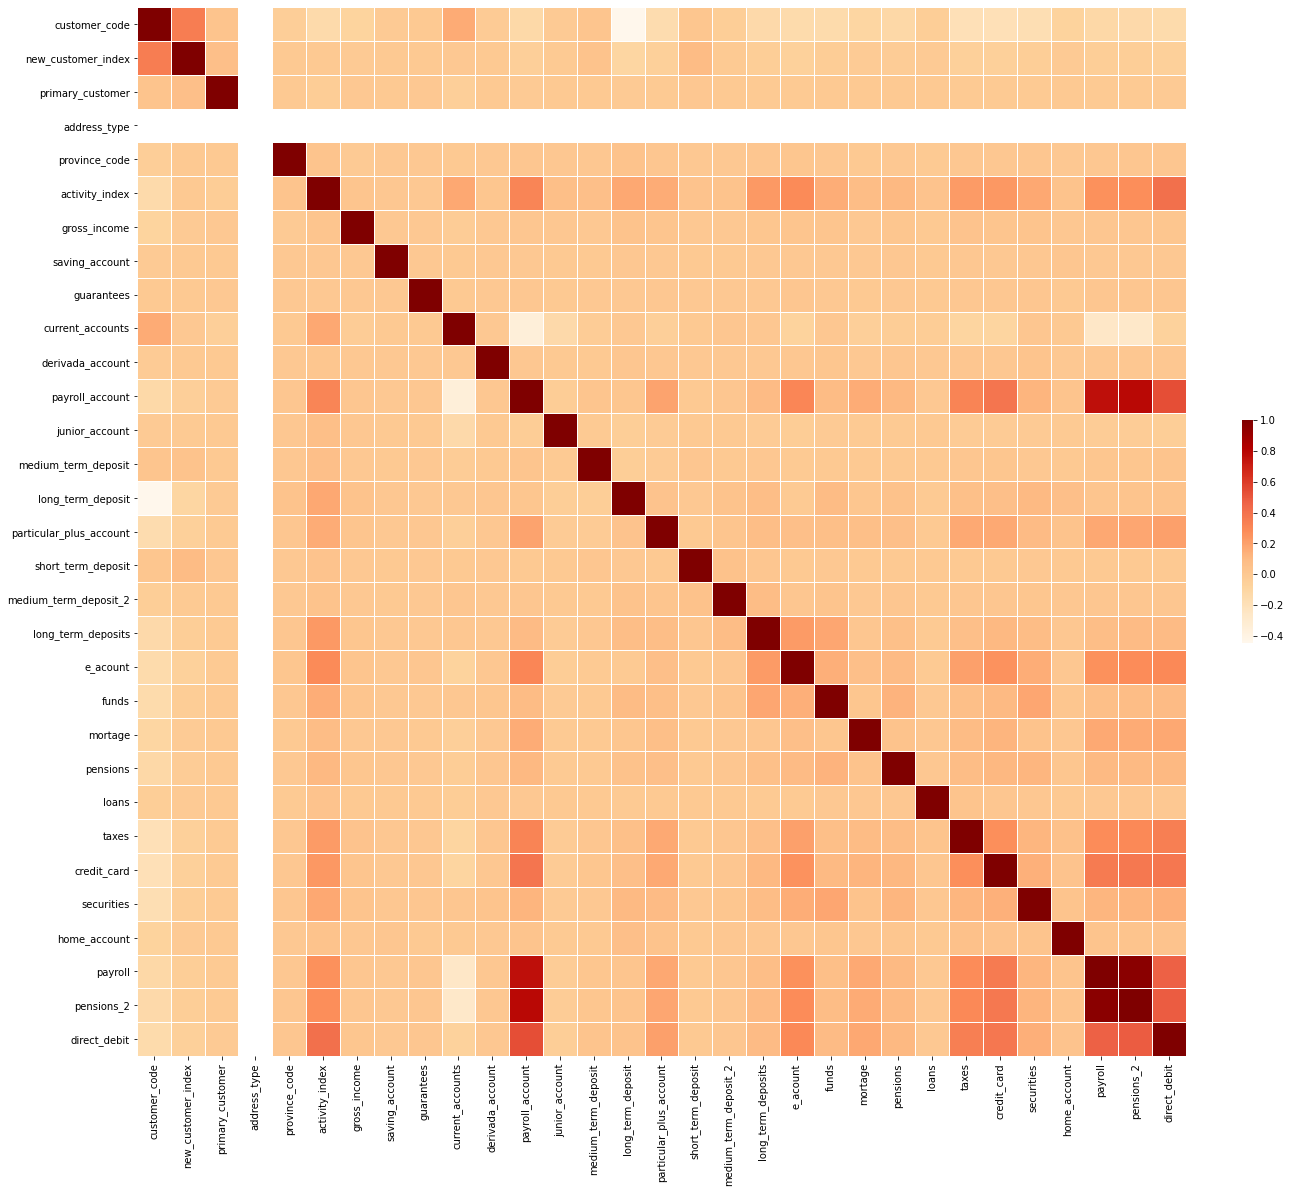

In [ ]:
# calculate correlation matrix
#cols = ["customer_code", "employee_index", "sex", "age", "gross_income", "residence_index"]
corr = df.corr()# plot the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(
    corr, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.01}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)
# sns.heatmap(corr, xticklabels=cols, yticklabels=cols, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

*The graph above shows that there is a strongly positive correlation between all the features in the dataset except for the address type which has no correlation.* 

### **Univariate Plot**



<AxesSubplot:xlabel='gender', ylabel='count'>

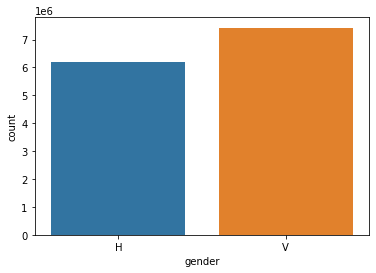

In [ ]:
sns.countplot(x = 'gender', data = df)

*From the graph above there are more females who has accounts than males.*

In [ ]:
# replace NA value in age with 0
df['age'] = df['age'].replace({' NA': np.nan})
df['age'] = df['age'].replace({' ': np.nan})
df['age'] = df['age'].fillna(0)
df["age"] = pd.to_numeric(df["age"])

df['gross_income'] = df['gross_income'].replace({'nan': np.nan})
df['gross_income'] = df['gross_income'].fillna(0)
df["gross_income"] = pd.to_numeric(df["gross_income"])

<AxesSubplot:xlabel='age', ylabel='gross_income'>

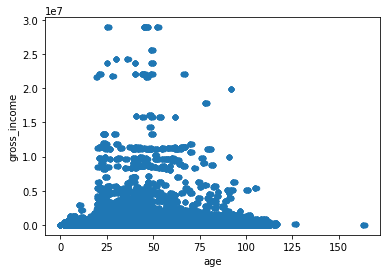

In [ ]:
df.plot(kind='scatter', x='age', y='gross_income')

*From the graph above shows the correlation between age groups and gross income.*

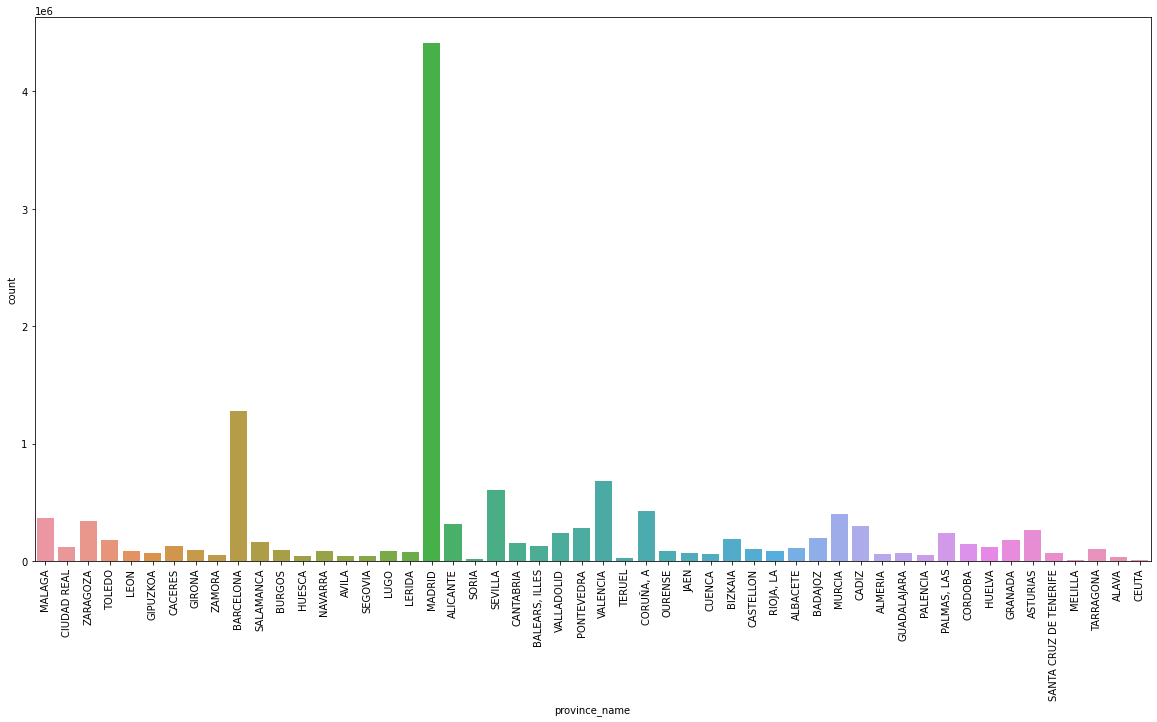

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'province_name', data = df)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows the number of customers in each province.*

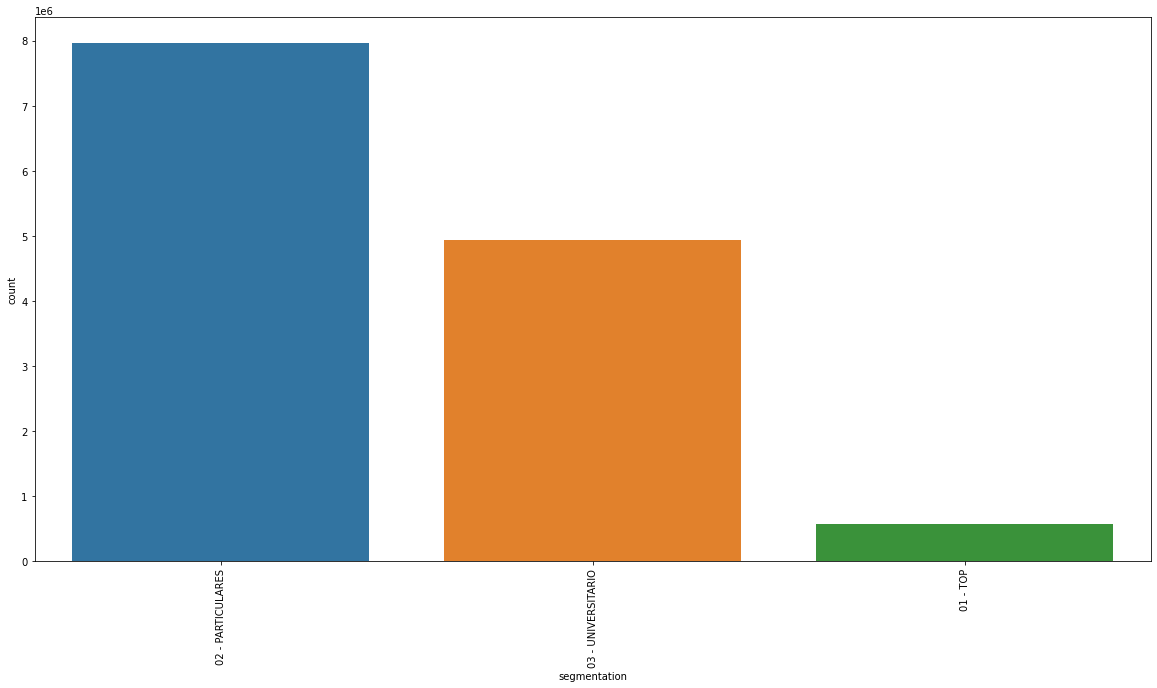

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'segmentation', data = df)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows that individuals(02 - PARTICULARES) has the highest amount of customer segmentation in the dataset.*

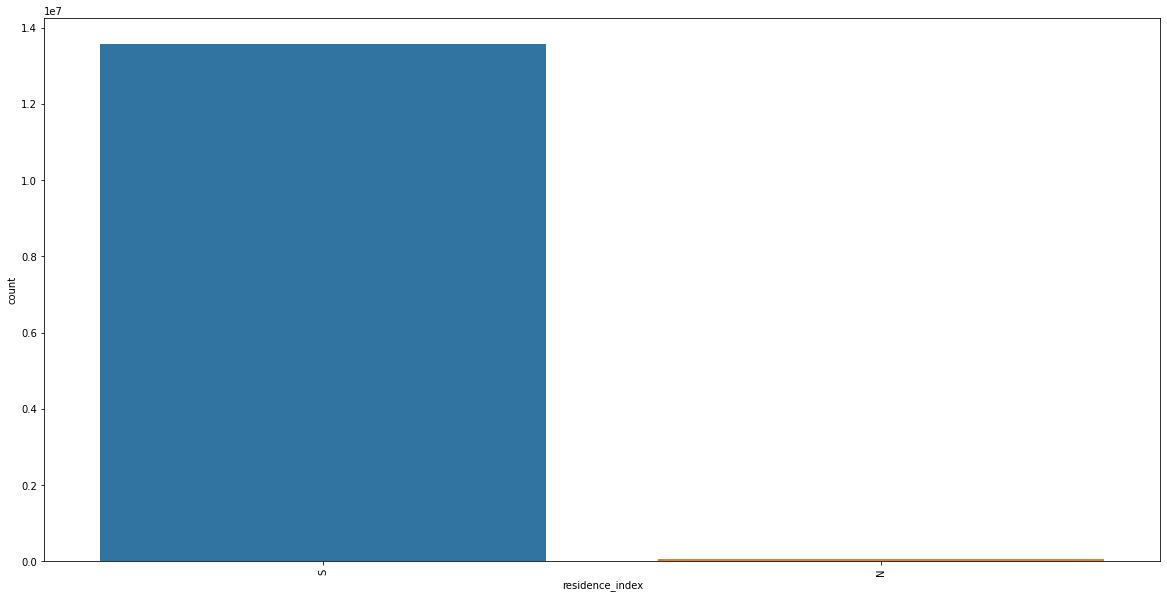

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'residence_index', data = df)
plt.xticks(rotation = 90)
plt.show()

*The gragh above shows that the majority of the customers(reseidence) live in the same country as the bank.* 



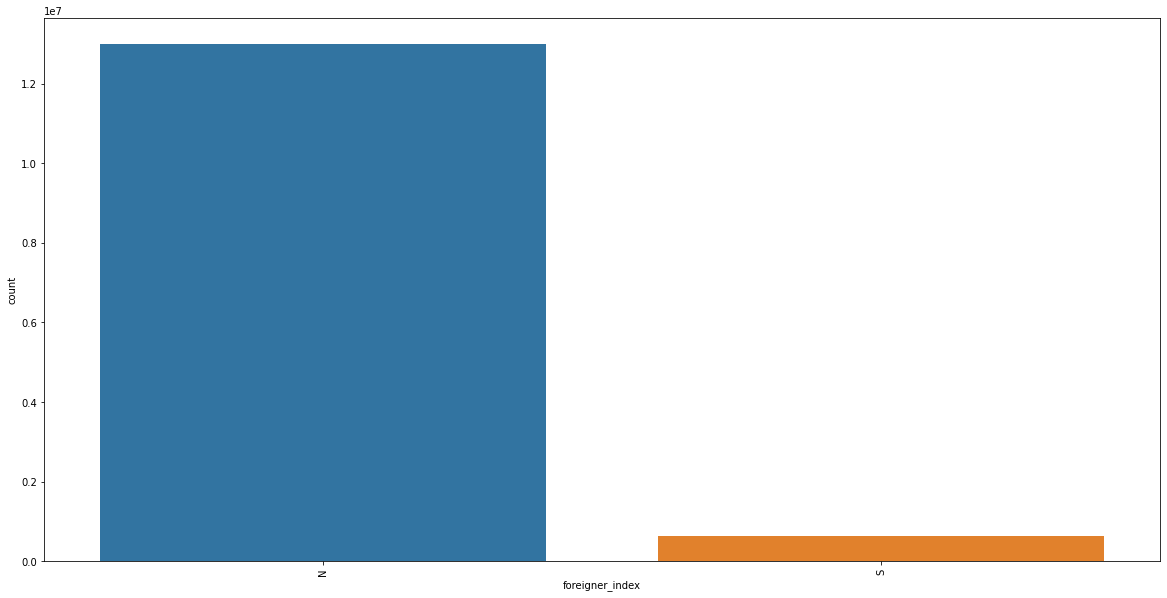

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'foreigner_index', data = df)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows that majority of the foreigner have banks outside of the country.*

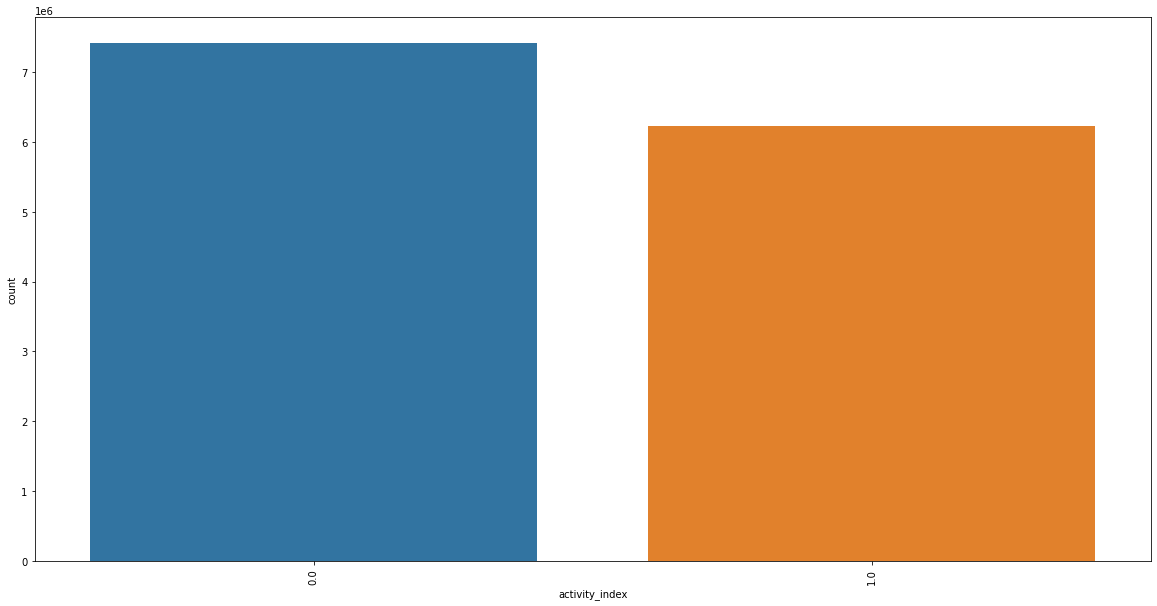

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'activity_index', data = df)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows that there are more inactive customers than there are active customers.*

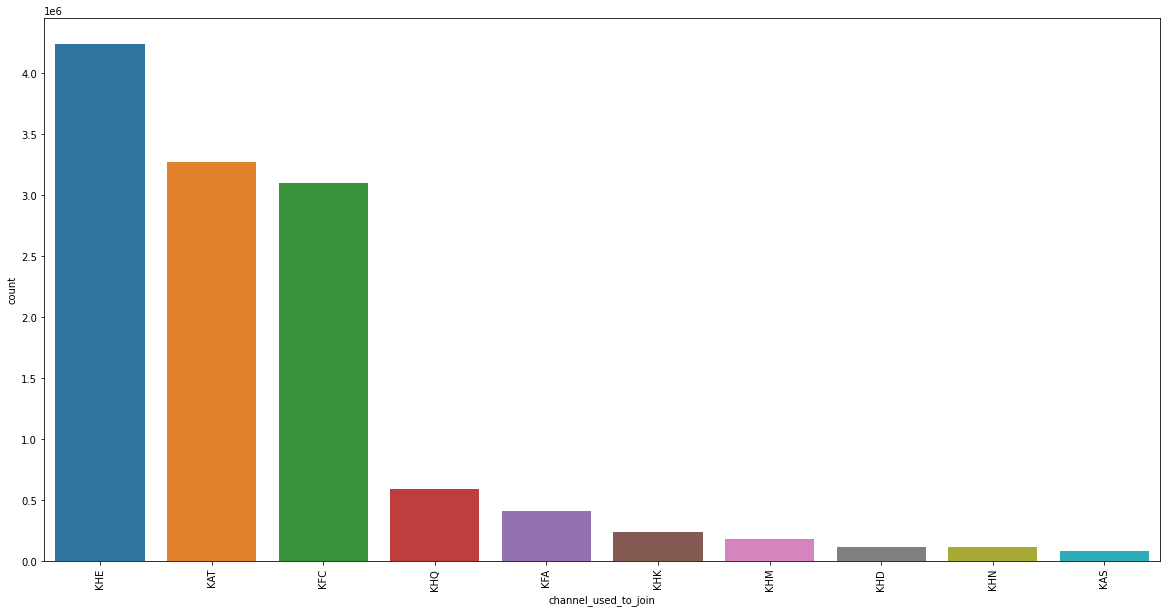

In [ ]:
plt.figure(figsize=(20,10))
barplot = sns.countplot(x = 'channel_used_to_join', data = df, order=pd.value_counts(df['channel_used_to_join']).iloc[:10].index)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows the top 10 channels that the customers used to joined the bank.*

In [ ]:
# replace NA value in age with 0
df['age'] = df['age'].replace({' NA': np.nan})
df['age'] = df['age'].replace({' ': np.nan})
df['age'] = df['age'].fillna(0)
df['age'].astype(str).astype(float).astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


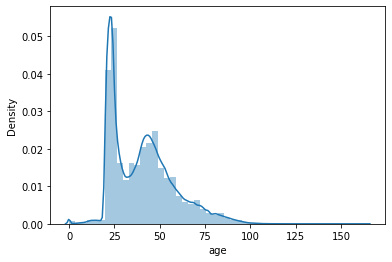

In [7]:
sns.distplot(df['age'])

*From the graph above, it can be noted that majority of the customers are from their 20s to late 40s.*

<Figure size 1440x720 with 0 Axes>

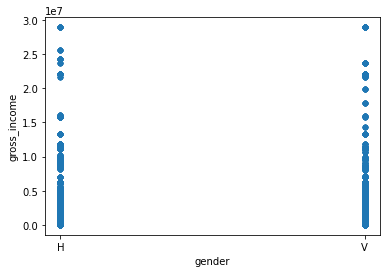

In [ ]:
df.plot.scatter(x = 'gender', y = 'gross_income')

*The graph above shows the income diversity of both male and female in the dataset*

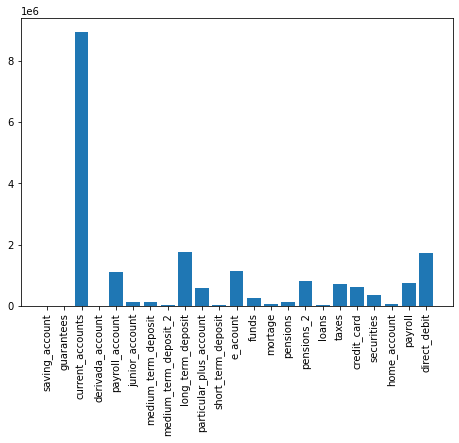

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
accounts = ['saving_account',
         'guarantees',
         'current_accounts',
         'derivada_account',
         'payroll_account',
         'junior_account',
         'medium_term_deposit',
         'medium_term_deposit_2',
         'long_term_deposit',
         'particular_plus_account',
         'short_term_deposit',
         'e_acount',
         'funds',
         'mortage',
         'pensions',
         'pensions_2',
         'loans',
         'taxes',
         'credit_card',
         'securities',
         'home_account',
         'payroll',
         'direct_debit']
active = [df['saving_account'].value_counts()[1],
            df['guarantees'].value_counts()[1],
            df['current_accounts'].value_counts()[1],
            df['derivada_account'].value_counts()[1],
            df['payroll_account'].value_counts()[1],
            df['junior_account'].value_counts()[1],
            df['medium_term_deposit'].value_counts()[1],
            df['medium_term_deposit_2'].value_counts()[1],
            df['long_term_deposit'].value_counts()[1],
            df['particular_plus_account'].value_counts()[1],
            df['short_term_deposit'].value_counts()[1],
            df['e_acount'].value_counts()[1],
            df['funds'].value_counts()[1],
            df['mortage'].value_counts()[1],
            df['pensions'].value_counts()[1],
            df['pensions_2'].value_counts()[1],
            df['loans'].value_counts()[1],
            df['taxes'].value_counts()[1],
            df['credit_card'].value_counts()[1],
            df['securities'].value_counts()[1],
            df['home_account'].value_counts()[1],
            df['payroll'].value_counts()[1],
            df['direct_debit'].value_counts()[1]]
ax.bar(accounts,active)
plt.xticks(rotation = 90)
plt.show()

*The graph above shows the amount of customers per account type.*

N0     9922900
YES    3724409
Name: multiple_accounts, dtype: int64

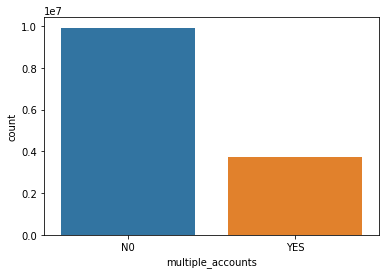

In [ ]:
# How many customers have more than one account 
df['multiple_accounts'] = ['YES' if x > 1 else 'N0' for x in np.sum(df[['saving_account', 'guarantees', 'current_accounts', 'derivada_account', 'payroll_account', 'junior_account', 'medium_term_deposit', 'medium_term_deposit_2', 'long_term_deposit', 'particular_plus_account', 'short_term_deposit', 'e_acount', 'funds', 'mortage', 'pensions', 'pensions_2', 'loans', 'taxes', 'credit_card', 'home_account', 'payroll', 'direct_debit']].values == 1, 1)]
sns.countplot(x = 'multiple_accounts', data = df)
df['multiple_accounts'].value_counts()

*The graph above shows the number of customers that has more than one account type.*

**Final Recommendation:**

Based on the exploratory data analysis ran, below are some recommendations that the analyst team at ABC analytics came up with to best help XYZ credit union use cross selling with existing customers.

* Use the mediums that the majority of customer sign up with to retarget them. Do ads that properly explain the services that XYZ credit union offers and how they will benefit an old client.

* Customer who currently only have one account – we recommend figuring out their needs based on age, income and other criteria then calling them for an appointment to suggest a personalized financial plan that is specifically suited for them. This will let XYZ credit union customers know that they are paying unique attention to their needs as clients.

* A complementary service or as we know it ‘Bundle sales’ can be provided for customers who add a new type of account. This helps the customers who are already a client to understand that things are changing and as such new customer are currently buying “x”

* With the exploratory data analysis completed XYZ credit union can also use a data-driven suggestion to cross-sell. Like, for example; if customers are always coming into the bank trying to make payments or do transaction, it can be suggested that they download the app for ease of going back and forth. Also, if a 65-year-old customer updated her pension to say she has a new grand baby; we can suggest that she opens a saving account for the new baby